In [1]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [2]:
"""gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) # Notice here
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)
    """

'gpus = tf.config.experimental.list_physical_devices(\'GPU\')\nif gpus:\n  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU\n  try:\n    tf.config.experimental.set_virtual_device_configuration(\n        gpus[0],\n        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) # Notice here\n    logical_gpus = tf.config.experimental.list_logical_devices(\'GPU\')\n    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")\n  except RuntimeError as e:\n    # Virtual devices must be set before GPUs have been initialized\n    print(e)\n    '

In [2]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [3]:
"""
    targets = targets.type(torch.LongTensor)   # casting to long
    inputs, targets = inputs.to(device), targets.to(device

"""

'\n    targets = targets.type(torch.LongTensor)   # casting to long\n    inputs, targets = inputs.to(device), targets.to(device\n\n'

In [3]:
#Load the data and extract features for each sound file
def load_data(test_size=0.5):
    x,y=[],[]
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/*/*.wav"):
        file_name=os.path.basename(file)
        L=file_name.split('_')
        if L[2]=='angry.wav':
          e='angry'
        if L[2]=='disgust.wav':
          e='disgust'
        if L[2]=='fear.wav':
          e='fear'
        if L[2]=='happy.wav':
          e='happy'
        if L[2]=='neutral.wav':
          e='neutral'
        if L[2]=='ps.wav':
          e='pleasant surprised'
        if L[2]=='sad.wav':
          e='sad'
        feature=extract_feature(file,mfcc=True,chroma=True,mel=True,zcr=True,rmse=True)
        x.append(feature)
        y.append(e)
    return train_test_split(np.array(x), y, test_size=test_size)

In [4]:
x_train,x_test,y_train,y_test=load_data(test_size=0.5)

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -2.7465820e-04 ...  1.8310547e-04
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  2.4414062e-04
  2.1362305e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  6.1035156e-05 ... -1.5869141e-03
 -1.1291504e-03 -1.0986328e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -2.1362305e-04 ...  1.1596680e-03
  8.5449219e-04  6.7138672e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.3569336e-04 -1.9226074e-03 ...  6.1035156e-05
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.5258789e-04 ...  6.4086914e-04
  6.1035156e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  3.0517578e-05 ...  1.5258789e-04
  6.1035156e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  9.1552734e-05
  1.2207031e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00012207 ...  0.00061035  0.00036621
  0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00015259 ...  0.00024414  0.00015259
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00033569 -0.00042725 ...  0.00128174  0.0010376
  0.00073242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.0001220

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00018311  0.00076294 ... -0.00106812 -0.00085449
 -0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  3.0517578e-05
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -9.1552734e-05 ... -3.3569336e-04
 -2.4414062e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -1.2207031e-04 ...  1.8310547e-04
  1.8310547e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -3.0517578e-05 ...  7.0190430e-04
  6.7138672e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00085449 -0.00360107 ...  0.00027466  0.00033569
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 6.1035156e-05 ... 1.0070801e-03 1.0986328e-03
 1.0070801e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ... -1.2207031e-04
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -1.8310547e-04
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -1.8310547e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -4.5776367e-04
 -5.7983398e-04 -1.0070801e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  4.5776367e-04
  5.7983398e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -1.5258789e-04 ...  2.4414062e-04
  2.7465820e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ... -9.1552734e-05
 -1.2207031e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.2207031e-04 ... -9.1552734e-05
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -3.0517578e-05 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 1.8310547e-04 ... 1.2207031e-04 9.1552734e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  6.1035156e-05
  9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -9.1552734e-05
 -9.1552734e-05 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.         0.00033569 0.00289917 ... 0.0005188  0.00033569 0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ... -1.8310547e-04
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -1.2207031e-04 ...  1.2207031e-04
  3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  6.1035156e-05 ... -1.1291504e-03
 -1.1901855e-03 -6.7138672e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ... -3.9672852e-04
 -6.4086914e-04 -3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  1.5258789e-04
  2.1362305e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ... -3.0517578e-04
 -2.7465820e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  2.4414062e-04
  2.7465820e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 9.1552734e-05 ... 9.1552734e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  0.0000000e+00 ... -1.2207031e-04
 -9.1552734e-05 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  9.1552734e-05 ... -3.9672852e-04
 -1.5258789e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00012207  0.00015259 ... -0.00024414 -0.00018311
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.2207031e-04 ... -1.5258789e-04
 -9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00054932 -0.00204468 ... -0.00012207 -0.00012207
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  1.5258789e-04 ... -1.2207031e-04
 -2.1362305e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  1.5258789e-04
  9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.9672852e-04 -2.1362305e-04 ...  3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -9.1552734e-05 ... -1.5258789e-04
 -9.1552734e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  9.1552734e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ... -6.7138672e-04
 -5.1879883e-04 -3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ... -2.7465820e-04
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 9.1552734e-05 ... 3.6621094e-04 3.6621094e-04
 2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ...  9.7656250e-04
  7.0190430e-04  4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00015259 ...  0.00097656  0.00057983
  0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00015259 ... -0.00039673 -0.00030518
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  2.1362305e-04  3.3569336e-04 ... -6.1035156e-05
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  2.4414062e-04
  3.3569336e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.5258789e-04 ...  1.5258789e-04
  9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.2207031e-04 ...  3.9672852e-04
  2.4414062e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  2.7465820e-04
  1.5258789e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ... -1.2207031e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  3.0517578e-05 ...  1.8310547e-04
  2.1362305e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ... -9.1552734e-05
  3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  3.0517578e-05 ... -1.0070801e-03
 -1.0375977e-03 -8.8500977e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.         0.00015259 0.0005188  ... 0.00057983 0.00036621 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00061035 -0.00177002 ...  0.00030518  0.00030518
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -3.0517578e-05 ...  5.7983398e-04
  3.0517578e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  2.4414062e-04 -2.7465820e-04 ...  1.2207031e-04
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  1.5258789e-04
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.5258789e-04 ... -9.1552734e-05
 -1.5258789e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -1.2207031e-04 ... -6.1035156e-05
  6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -5.4931641e-04 ...  9.1552734e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.5258789e-04 ... -9.1552734e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -1.2207031e-04 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 6.1035156e-05 ... 3.3569336e-04 2.7465820e-04
 3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  4.2724609e-04
  2.7465820e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  2.1362305e-04
  3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  9.1552734e-05
  1.2207031e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ...  3.0517578e-05
  6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -2.1362305e-04 ... -3.3569336e-04
 -3.0517578e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -1.2207031e-04 ... -6.1035156e-05
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  6.1035156e-05 ... -9.1552734e-05
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  6.1035156e-05 ... -1.8310547e-04
 -1.2207031e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 3.3569336e-04 2.4414062e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -1.5258789e-04 ... -1.8310547e-04
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00198364 -0.00195312 ...  0.0005188   0.00042725
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.8310547e-04 ... -7.0190430e-04
  6.1035156e-05 -3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00054932 -0.00057983 ...  0.00079346  0.00085449
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.5258789e-04 ...  3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ... -1.8310547e-03
 -1.7089844e-03 -1.6174316e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.6621094e-04 9.1552734e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.1362305e-04
  1.5258789e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  9.1552734e-05 ... -1.2207031e-04
 -3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.2207031e-04 ...  3.3569336e-04
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.2207031e-04 ...  2.4414062e-04
  2.4414062e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 1.5258789e-04 6.1035156e-05 ... 1.2207031e-04 1.2207031e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.          0.00094604  0.00088501 ... -0.0007019  -0.00054932
 -0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 1.2207031e-04 ... 6.1035156e-05 2.7465820e-04
 1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -9.1552734e-05 ...  2.1362305e-04
  1.5258789e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 0.0000000e+00 ... 5.1879883e-04 5.1879883e-04
 3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: Fu

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -2.1362305e-04 ... -1.2207031e-04
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 9.1552734e-05 ... 1.5258789e-04 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00189209 -0.00192261 ...  0.00030518  0.00024414
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  6.1035156e-05 ... -2.1362305e-04
 -2.4414062e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ... -8.5449219e-04
 -3.9672852e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -2.1362305e-04 ... -6.1035156e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00024414 -0.00039673 ... -0.00091553 -0.00085449
 -0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  3.0517578e-05
  1.2207031e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -2.1362305e-04 ...  7.3242188e-04
  9.4604492e-04  8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.2207031e-04 ...  1.2207031e-04
  1.5258789e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00012207 ... -0.00079346 -0.00045776
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.8310547e-04 ... -2.1362305e-04
 -1.8310547e-04 -2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -1.2207031e-04 ... -9.1552734e-05
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  1.5258789e-04 ... -1.5258789e-04
 -3.0517578e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  9.1552734e-05
  3.0517578e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 0.0000000e+00 ... 6.1035156e-05 1.5258789e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -1.8310547e-04 ...  6.1035156e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  2.7465820e-04
  2.7465820e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  1.2207031e-04
  1.5258789e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  6.1035156e-05 ... -9.1552734e-05
 -1.5258789e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  1.5258789e-04 ...  6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -1.2207031e-04 ...  3.0517578e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00015259 ... -0.00015259 -0.00018311
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  1.2207031e-04
  1.5258789e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 3.0517578e-05 ... 2.4414062e-04 1.2207031e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.8310547e-04 ... -1.8310547e-04
 -9.1552734e-05 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  3.9672852e-04
  3.0517578e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  0.0000000e+00 ... -6.4086914e-04
 -4.8828125e-04 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -2.4414062e-04 -2.1362305e-04 ...  1.5258789e-04
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  9.1552734e-05  6.1035156e-05 ... -6.1035156e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00112915 -0.0022583  ...  0.00061035  0.00057983
  0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -2.1362305e-04 -1.8310547e-04 ...  0.0000000e+00
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.8310547e-04 -4.8828125e-04 ...  1.5258789e-04
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -6.1035156e-05 ... -2.1362305e-04
 -3.0517578e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  1.2207031e-04  6.1035156e-05 ...  9.1552734e-05
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -4.2724609e-04 ...  0.0000000e+00
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ...  6.1035156e-05
  6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  6.1035156e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -9.1552734e-05 -6.1035156e-05 ... -9.1552734e-05
 -2.1362305e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-04 -1.2207031e-04 ... -1.2207031e-04
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.2207031e-04 ... -1.2207031e-04
 -1.8310547e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  9.1552734e-05 ... -2.1362305e-04
 -1.8310547e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[1.8310547e-04 6.7138672e-04 3.3569336e-04 ... 7.6293945e-04 9.1552734e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -3.3569336e-04 -4.5776367e-04 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00012207 -0.00024414 -0.00091553 ... -0.00039673  0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -4.2724609e-04 -1.3732910e-03 ... -2.4414062e-04
 -6.4086914e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -2.1362305e-04 ...  1.8310547e-04
  2.7465820e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00030518 -0.00030518 -0.00149536 ...  0.00018311  0.00018311
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00042725  0.00088501 -0.00012207 ... -0.00039673 -0.00054932
 -0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -5.4931641e-04 -8.8500977e-04 ...  3.3569336e-04
  1.5258789e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00018311  0.00012207  0.00021362 ...  0.00018311 -0.00024414
 -0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00021362  0.00012207 -0.00030518 ...  0.00015259  0.00012207
  0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -3.9672852e-04 -6.1035156e-04 ...  1.5258789e-04
 -1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00094604  0.00039673 -0.0015564  ...  0.00030518  0.00015259
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  9.1552734e-05 ... -6.1035156e-05
 -3.3569336e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -3.0517578e-05 -1.5258789e-04 ... -5.4931641e-04
 -4.5776367e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.9672852e-04  3.0517578e-04 -5.4931641e-04 ...  9.1552734e-05
  6.1035156e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04  1.2207031e-04 -6.4086914e-04 ...  0.0000000e+00
  6.1035156e-05 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -2.4414062e-04 -1.2207031e-04 ...  9.1552734e-05
 -3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04 -4.8828125e-04 -5.7983398e-04 ...  6.1035156e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -2.4414062e-04 -4.8828125e-04 ...  3.0517578e-05
  4.2724609e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-5.1879883e-04  6.1035156e-05 -2.4414062e-04 ... -5.7983398e-04
 -3.9672852e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -8.8500977e-04 -2.9602051e-03 ... -3.0517578e-05
 -1.5258789e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  3.0517578e-04  9.1552734e-05 ... -2.4414062e-04
 -1.2207031e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 1.5258789e-04 2.4414062e-04 ... 1.2207031e-04 2.1362305e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.0517578e-04 -6.1035156e-05 ...  3.0517578e-04
  1.2207031e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-2.4414062e-04 -6.1035156e-05  3.0517578e-05 ... -4.2724609e-04
 -2.1362305e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00012207 -0.00012207 ...  0.          0.00012207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  3.0517578e-05  6.1035156e-05 ... -3.0517578e-04
 -6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 9.1552734e-05 1.2207031e-04 ... 1.2207031e-04 1.5258789e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[9.1552734e-05 2.4414062e-04 2.4414062e-04 ... 1.5258789e-04 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -3.0517578e-05  0.0000000e+00 ... -2.7465820e-04
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: Fu

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-5.1879883e-04 -2.4414062e-04  5.4931641e-04 ...  9.1552734e-05
  1.8310547e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -2.7465820e-04 ... -1.8310547e-04
 -9.1552734e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04  6.1035156e-05 -3.0517578e-05 ... -1.2207031e-04
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00015259 -0.00018311 ...  0.00036621  0.00024414
  0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[2.1362305e-04 2.1362305e-04 1.5258789e-04 ... 6.1035156e-05 1.8310547e-04
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  0.0000000e+00  3.0517578e-05 ... -1.2207031e-04
  9.1552734e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00021362 -0.00064087 -0.00048828 ... -0.00030518 -0.00018311
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  0.0000000e+00 ... -2.4414062e-04
 -2.1362305e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[1.5258789e-04 3.6621094e-04 4.5776367e-04 ... 2.1362305e-04 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00045776 -0.00039673 ...  0.00369263  0.00289917
  0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04 -2.4414062e-04 -1.2207031e-04 ...  1.5258789e-04
  6.1035156e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -3.9672852e-04  0.0000000e+00 ...  7.0190430e-04
  1.1596680e-03  7.0190430e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00018311  0.00027466 -0.00061035 ... -0.00106812 -0.00057983
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00039673 -0.00067139 -0.00036621 ... -0.00094604 -0.00088501
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00042725  0.00061035  0.00033569 ... -0.00094604 -0.00076294
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.000183

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00015259 -0.00039673 -0.00158691 ...  0.00067139  0.00067139
  0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -1.5258789e-04 ... -3.9672852e-04
 -4.2724609e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2817383e-03 -3.0517578e-04 -3.0517578e-05 ...  3.9672852e-04
  6.7138672e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-04 1.8310547e-04 9.1552734e-05 ... 3.9672852e-04 3.6621094e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-03  2.1362305e-04 -1.5563965e-03 ... -4.8828125e-04
 -2.4414062e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  3.6621094e-04  6.1035156e-04 ... -4.5776367e-04
 -3.6621094e-04 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -5.4931641e-04 -9.7656250e-04 ... -4.2724609e-04
 -3.3569336e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00015259 -0.00018311 -0.00079346 ...  0.00067139  0.00143433
  0.00057983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04 -7.6293945e-04 -1.7395020e-03 ... -2.4414062e-04
  2.7465820e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04 -4.2724609e-04 -1.1596680e-03 ...  1.8310547e-04
  1.5258789e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 4.0893555e-03  7.9345703e-04 -5.8288574e-03 ... -1.4953613e-03
 -7.3242188e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  1.2207031e-04  1.5258789e-04 ... -5.4931641e-04
  0.0000000e+00  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00088501  0.00094604 -0.00012207 ... -0.00021362  0.00012207
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -3.9672852e-04 -7.9345703e-04 ... -2.7465820e-04
  3.0517578e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 8.2397461e-04  1.4648438e-03 -3.3569336e-04 ...  6.4086914e-04
  4.8828125e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -3.0517578e-04 -9.1552734e-05 ... -1.0681152e-03
 -1.1291504e-03 -4.8828125e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00039673 -0.00064087  0.0017395  ...  0.00247192  0.00201416
  0.00067139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.8310547e-04 -3.0517578e-05 -4.2724609e-04 ... -2.1362305e-04
  1.2207031e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05 -2.1362305e-04 ...  2.4414062e-04
  8.8500977e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00585938 -0.00100708 -0.00305176 ...  0.0017395   0.00186157
  0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -6.1035156e-05  5.4931641e-04 ... -1.4953613e-03
 -1.3732910e-03 -7.9345703e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00027466 0.00030518 0.00021362 ... 0.00067139 0.00057983 0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00024414 -0.00033569 -0.00045776 ...  0.00186157  0.00128174
  0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0043335   0.00274658 -0.00244141 ...  0.00057983  0.00048828
  0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00369263 -0.00247192 -0.0

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00149536 -0.00106812  0.00067139 ... -0.00057983 -0.0007019
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00134277 -0.00109863 -0.00064087 ... -0.00064087 -0.00030518
  0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 1.5258789e-04 ... 1.4648438e-03 9.4604492e-04
 4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.0007019

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00057983 -0.00146484 -0.00244141 ... -0.00289917 -0.00228882
 -0.00112915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00042725 -0.00292969 -0.0017395  ...  0.00012207  0.00036621
  0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.7465820e-04 -9.1552734e-05 -2.2583008e-03 ...  8.2397461e-04
  1.1596680e-03  5.1879883e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.4086914e-04 -1.5563965e-03 -2.4719238e-03 ...  3.0517578e-05
  1.0681152e-03  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0012207   0.0022583   0.0010376  ... -0.00015259  0.00030518
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00067139 0.00109863 0.00027466 ... 0.00137329 0.00085449 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -1.2207031e-04 ... -2.1362305e-04
 -2.4414062e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0012207   0.00015259 -0.00119019 ... -0.00018311 -0.00015259
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00012207 -0.00231934 -0.00140381 ...  0.00112915  0.00057983
  0.00061035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04  2.4414062e-04  2.4414062e-04 ... -1.8310547e-04
 -1.2207031e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -3.9672852e-04 -3.0517578e-04 ...  1.8310547e-04
  5.4931641e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -2.4414062e-04 -5.1879883e-04 ...  3.0517578e-05
  5.1879883e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.6621094e-04 -8.2397461e-04 ...  3.0517578e-04
  2.1362305e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207 -0.00021362 -0.00015259 ...  0.00027466  0.00012207
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04  9.1552734e-05 -9.1552734e-05 ... -3.9672852e-04
 -3.6621094e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -1.5258789e-04 -4.8828125e-04 ...  3.0517578e-04
  4.8828125e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-1.2207031e-04  1.5258789e-04  1.5258789e-04 ...  3.9672852e-04
  5.1879883e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.5258789e-04 -1.2207031e-04 -2.1362305e-04 ...  2.7465820e-04
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -9.1552734e-05 -1.5258789e-04 ... -1.8310547e-04
 -6.1035156e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -2.1362305e-04 -1.5258789e-04 ...  3.0517578e-04
  3.0517578e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.9672852e-04 -2.7465820e-04 ... -3.3569336e-04
  3.0517578e-05  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00018311 -0.00036621 -0.00024414 ...  0.00030518  0.00012207
  0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -9.1552734e-05 ...  3.0517578e-04
  3.9672852e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05 -1.2207031e-04 ...  4.2724609e-04
  3.3569336e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWa

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  3.0517578e-05 -6.1035156e-05 ...  2.6855469e-03
  1.5563965e-03  1.0375977e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -4.8828125e-04 -6.1035156e-05 ...  0.0000000e+00
  1.8310547e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00036621 0.00067139 0.00054932 ... 0.00079346 0.00061035 0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 4.8828125e-04  5.7983398e-04 -3.0517578e-05 ...  2.4414062e-04
  2.4414062e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-6.1035156e-05  1.8310547e-04  3.0517578e-04 ...  2.1362305e-04
  1.5258789e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -5.4931641e-04 ... -1.8310547e-04
  3.0517578e-05  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-04 ...  1.8310547e-04
  2.1362305e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -1.8310547e-04 ... -1.5258789e-04
 -1.5258789e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  1.2207031e-04  1.5258789e-04 ... -2.4414062e-04
 -3.0517578e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.00012207 -0.00018311 -0.0007019  ... -0.00054932 -0.00039673
 -0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-0.00012207  0.          0.00015259 ... -0.00033569 -0.00018311
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[3.6

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05 -3.0517578e-05 ...  1.0986328e-03
  6.7138672e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  9.1552734e-05 ...  1.2207031e-04
  5.4931641e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -1.2207031e-04 -6.1035156e-04 ... -1.0986328e-03
 -5.7983398e-04 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 7.3242188e-04 -3.0517578e-05 -1.0681152e-03 ... -6.7138672e-04
 -6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05 -1.8310547e-04 ... -2.7465820e-04
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04 -2.1362305e-04 -7.9345703e-04 ...  1.2207031e-04
 -1.8310547e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.4414062e-04 -1.5258789e-04 -3.0517578e-04 ...  2.4414062e-04
  6.1035156e-05  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -7.0190430e-04 -7.3242188e-04 ...  7.0190430e-04
  3.0517578e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-9.1552734e-05 -1.5258789e-04  1.2207031e-04 ... -7.9345703e-04
 -5.7983398e-04 -3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -7.6293945e-04 -1.2207031e-03 ...  8.5449219e-04
  4.5776367e-04  3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  1.5258789e-04 -6.1035156e-05 ...  3.3569336e-04
  1.8310547e-04  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[5.1879883e-04 2.4414062e-04 0.0000000e+00 ... 9.1552734e-05 2.1362305e-04
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -3.9672852e-04 -3.9672852e-04 ...  4.8828125e-04
  4.8828125e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00024414 0.00054932 0.00057983 ... 0.00085449 0.00024414 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.         -0.00045776 -0.00054932 ...  0.00012207  0.00024414
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-2.1362305

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[-3.0517578e-05  9.1552734e-05  3.9672852e-04 ...  1.2207031e-04
  2.4414062e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04 -1.8310547e-04 -6.1035156e-05 ... -3.0517578e-04
 -2.4414062e-04 -4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[1.5258789e-04 9.1552734e-05 9.1552734e-05 ... 3.0517578e-05 1.5258789e-04
 4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[2.1362305e-04 1.2207031e-04 2.4414062e-04 ... 1.5258789e-04 2.7465820e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -2.4414062e-04 ...  3.0517578e-05
 -1.5258789e-04 -2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.0517578e-05 -2.4414062e-04 -2.4414062e-04 ... -3.3569336e-04
 -2.7465820e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -6.1035156e-05 -9.1552734e-05 ... -1.5258789e-04
  2.1362305e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05  3.0517578e-04  3.9672852e-04 ...  6.1035156e-05
 -2.4414062e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.8310547e-04  7.6293945e-04  7.3242188e-04 ... -4.5776367e-04
 -1.8310547e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -9.1552734e-05 ...  1.2207031e-04
  3.0517578e-05  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  9.1552734e-05  3.9672852e-04 ... -6.1035156e-04
  1.2207031e-04  3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 6.1035156e-05  1.2207031e-04 -6.1035156e-05 ...  6.7138672e-04
 -6.1035156e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 9.1552734e-05 -1.2207031e-04 -2.7465820e-04 ... -2.1362305e-04
 -1.8310547e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  3.0517578e-05
 -6.1035156e-05  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00027466 0.         0.00042725 ... 0.00033569 0.00079346 0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: 

<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 2.1362305e-04  2.7465820e-04  1.5258789e-04 ...  3.0517578e-05
 -2.4414062e-04  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 1.2207031e-04 -3.0517578e-05 -4.5776367e-04 ... -1.2207031e-04
 -3.0517578e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f0adb>:14: FutureWarning: Pass y=[ 3.6621094e-04  8.5449219e-04  5.1879883e-04 ... -3.0517578e-05
 -9.1552734e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-9dabec9f

In [66]:
labels = [y_train,y_test]
from itertools import chain
labels = list(chain.from_iterable(labels))
labels

['pleasant surprised',
 'pleasant surprised',
 'neutral',
 'neutral',
 'pleasant surprised',
 'angry',
 'disgust',
 'sad',
 'pleasant surprised',
 'happy',
 'happy',
 'angry',
 'disgust',
 'happy',
 'neutral',
 'fear',
 'angry',
 'fear',
 'angry',
 'neutral',
 'neutral',
 'neutral',
 'pleasant surprised',
 'disgust',
 'fear',
 'neutral',
 'angry',
 'angry',
 'neutral',
 'disgust',
 'fear',
 'sad',
 'pleasant surprised',
 'neutral',
 'happy',
 'angry',
 'pleasant surprised',
 'neutral',
 'pleasant surprised',
 'sad',
 'fear',
 'angry',
 'disgust',
 'pleasant surprised',
 'disgust',
 'happy',
 'neutral',
 'fear',
 'happy',
 'sad',
 'happy',
 'pleasant surprised',
 'pleasant surprised',
 'happy',
 'neutral',
 'pleasant surprised',
 'pleasant surprised',
 'happy',
 'fear',
 'neutral',
 'happy',
 'disgust',
 'fear',
 'angry',
 'happy',
 'neutral',
 'sad',
 'fear',
 'happy',
 'happy',
 'fear',
 'happy',
 'fear',
 'angry',
 'pleasant surprised',
 'fear',
 'fear',
 'happy',
 'angry',
 'happy',

In [68]:
df = pd.DataFrame(labels, columns =['emo'])
df

,emo
0,pleasant surprised
1,pleasant surprised
2,neutral
3,neutral
4,pleasant surprised
...,...
2795,pleasant surprised
2796,happy
2797,disgust
2798,pleasant surprised


In [69]:
df.groupby('emo').size()

emo
angry                 400
disgust               400
fear                  400
happy                 400
neutral               400
pleasant surprised    400
sad                   400
dtype: int64

In [70]:
final_labels = ['angry' ,       
'disgust '  ,   
'fear'   ,   
'hppy' ,    
'neutral'   ,    
'pleasant surprised'  ,     
'sad' ]

[Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '400'),
 Text(0, 0, '400')]

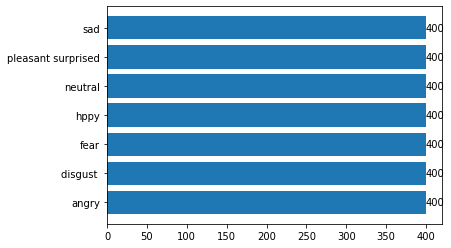

In [72]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

bars = plt.barh(final_labels ,df.groupby('emo').size())
plt.bar_label(bars)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [74]:
import time
start = time.time()
model=MLPClassifier(alpha=0.0001, batch_size=64, epsilon=1e-08, hidden_layer_sizes=(500,), learning_rate='constant',activation='logistic',solver='adam',max_iter=600)
model.fit(x_train,y_train)
end = time.time()
train_time_total=end-start
print(train_time_total)

4.146405935287476


In [75]:
start = time.time()
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
end = time.time()
test_time_total=end-start
print(test_time_total)

Logistic-Accuracy: 99.57%
                    precision    recall  f1-score   support

             angry       1.00      1.00      1.00       213
           disgust       0.99      0.99      0.99       212
              fear       1.00      0.99      1.00       182
             happy       0.99      0.99      0.99       196
           neutral       1.00      1.00      1.00       205
pleasant surprised       0.99      0.99      0.99       196
               sad       0.99      0.99      0.99       196

          accuracy                           1.00      1400
         macro avg       1.00      1.00      1.00      1400
      weighted avg       1.00      1.00      1.00      1400

0.04099750518798828


In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred,normalize='true')
conf_matrix= pd.DataFrame(cm,columns=None)
conf_matrix.to_csv(r'D:/thesis_codes/output/confusion_matrix.csv', index = False, header=False)

In [77]:
from imblearn.metrics import specificity_score
s=specificity_score(y_test,y_pred,average='macro')
print(s)

0.9992848913114695


In [78]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict_proba(x_test)
auc=roc_auc_score(y_test, y_pred, average='macro',multi_class='ovo')
print(auc)

0.9999220031555768


In [79]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_pred=model.predict(x_test)
p=precision_score(y_test, y_pred,average='macro')
r=recall_score(y_test, y_pred,average='macro')
f=f1_score(y_test, y_pred,average='macro')
print(p,r,f)

0.9957442388341766 0.9956807728274806 0.9957105067686138


In [80]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(TPR)
print(FPR)

[1.         0.99056604 0.99450549 0.99489796 1.         0.99489796
 0.99489796]
[0.         0.00176609 0.         0.00085034 0.         0.0016365
 0.00078616]


In [81]:
from pandas import DataFrame
C = {
     'test acc':[str(accuracy)],
     'precision(macro)':[str(p)],
     'recall(macro)':[str(r)],
     'f1(macro)':[str(f)],
     'specificity(macro)':[str(s)],
     'AUC(macro)':[str(auc)],
     'total train time':[str(train_time_total)],
     'total test time':[str(test_time_total)]}
df = DataFrame(C, columns= ['test acc','precision(macro)','recall(macro)','f1(macro)','specificity(macro)','AUC(macro)','total train time','total test time'])
export_csv = df.to_csv (r'E:\result2.csv', index = None, header=True) 
print (df)

             test acc    precision(macro)       recall(macro)  \
0  0.9957142857142857  0.9957442388341766  0.9956807728274806   

            f1(macro)  specificity(macro)          AUC(macro)  \
0  0.9957105067686138  0.9992848913114695  0.9999220031555768   

    total train time      total test time  
0  4.146405935287476  0.04099750518798828  


In [83]:
from pandas import DataFrame
C = {
     'TPR': TPR,
     'FPR': FPR}
df = DataFrame(C, columns= ['TPR','FPR'])
export_csv = df.to_csv (r'D:/thesis_codes/output/result3.csv', index = None, header=True) 
print (df)

        TPR       FPR
0  1.000000  0.000000
1  0.990566  0.001766
2  0.994505  0.000000
3  0.994898  0.000850
4  1.000000  0.000000
5  0.994898  0.001637
6  0.994898  0.000786


In [84]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[213   0   0   0   0   0   0]
 [  0 210   0   0   0   1   1]
 [  0   1 181   0   0   0   0]
 [  0   0   0 195   0   1   0]
 [  0   0   0   0 205   0   0]
 [  0   0   0   1   0 195   0]
 [  0   1   0   0   0   0 195]]


In [85]:
cm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([100.        ,  99.05660377,  99.45054945,  99.48979592,
       100.        ,  99.48979592,  99.48979592])

Text(0.5, 1.0, 'accuracy of each class')

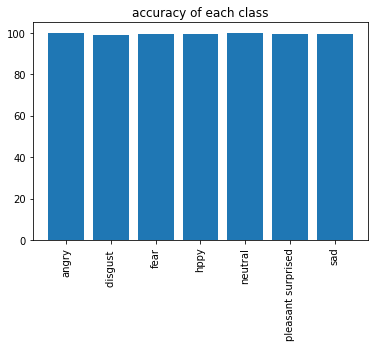

In [90]:
plt.bar(final_labels,cm.diagonal()*100)
plt.xticks(rotation=90)
plt.title("accuracy of each class")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'angry'),
  Text(0, 1.5, 'disgust '),
  Text(0, 2.5, 'fear'),
  Text(0, 3.5, 'hppy'),
  Text(0, 4.5, 'neutral'),
  Text(0, 5.5, 'pleasant surprised'),
  Text(0, 6.5, 'sad')])

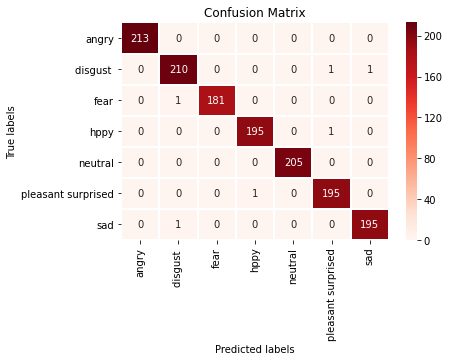

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(final_labels); ax.yaxis.set_ticklabels(final_labels);
plt.xticks(rotation=90)
plt.yticks(rotation=0)